Dans cette partie, vous allez apprendre à propager des incertitudes vers des mesurandes indirects.

```{margin}
Pour rappel un mesurande _direct_ est obtenu par lecture sur un instrument de mesure alors qu'un mesurande _indirect_ est obtenue par calcul à partir des mesurandes directs.
```

Cette fois, on ne peut évaluer des composantes de l'incertitude d'un mesurande indirect liés au processus de lecture du résultat de mesurage, 
puisqu'on le calcule.

# Incertitude des mesurandes indirectes.

## Position du problème.
On a mesuré des grandeurs $X_i$ dont on a estimé l'incertitude-type (et la distibution statistique possiblement) et on considère un mesurande Y qu'on recherche et qu'on peut estimer grâce à une relation :

$$
Y = f(X_i)
$$

```{admonition} Exemple
:class: tip
On veut mesurer la valeur $R$ d'une résistance électrique. On a mesuré la tension $U$ à ses bornes et l'intensité $I$ qui la traverse. On va estimer la résistance en utilisant la loi d'Ohm :  $R = U / I$.
```

On veut estimer l'incertitude-type sur Y et possiblement aussi sa distribution statistique.

## Méthodes
Il existe deux méthodes :
1. La __simulation de Monte-Carlo__. Le principe est exactement le même que précédemment. La différence est qu'on a plus besoin de centrer les distributions des $X_i$ autour de 0.
2. La __propagation des variances__. On utilise des relations entre les variances de grandeurs liés entre elles.

__Remarque : Dans les deux cas, on est obligé de supposer que les mesurandes $X_i$ sont tous indépendants. Sinon, les deux méthodes ne sont pas valables.__

## Simulation de Monte-Carlo.

### Principe
On rappelle brièvement le principe de la simulation de Monte-Carlo. On connaît la distribution statistique de chaque mesurande $X_i$. On va simuler N échantillons de chaque $X_i$ puis on calcule ainsi N échantillons $Y$. On obtient ainsi la distribution des valeurs de $Y$ et on peut calculr son incertitude de mesure.

```{note}
Dans l'exemple qui suit, on a supposé pour simplifier que les incertitude-type et distribution des mesurandes directs ont déjà été déterminées (ou viennent d'information extérieures). En pratique, elles sont souvent déterminées à partir d'une ou plusieurs sources d'incertitudes. On peut alors combiner la méthode présentée précédemment et celle présentée ici (ce sera fait par la suite).
```

![Principe de la simulation de Monte-Carlo](./images/simulation_mc.png)

### Exemple
```{admonition} Résistance électrique
:class: tip
On reprend l'exemple précédent de l'estimation de l'incertitude de la résistance R. On a mesuré tension et intensité. On a trouvé :
 
* Un tension $U = 4.53 V$ avec une incertitude $u(U) = 0.03 V$. On a estimé que la loi de probabilité étant gaussienne.
* Une intensité $I = 12.14 mA$ avec une incertitude $u(I) = 0.08 mA$. On a estimé que la loi de probabilité étant gaussienne.
```

La cellule ci-dessous permet d'observer la méthode de Monte-Carlo. La méthode est :
1. On créer deux vecteurs de taille N contenant des tirages aléatoires de U et I basés sur les distibutions choisies.
2. On obtient un vecteur de taille N contenant des valeurs simulés de R.
3. On trace l'histogramme et on calcule la moyenne et l'écart-type de la distribution qui nous donnerons le résultat de mesurage et l'incertitude-type.

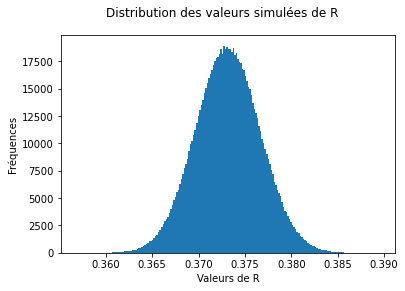

La résistance vaut 373.2 +/- 3.5 Ohm


In [1]:
import numpy.random as rd  # La bibliothèque numpy.random contient les fonctions générant des échantillons aléatoires.
import numpy as np  # La biliothèque numpy permettra de calculer la moyenne et l'écart-type d'un ensemble des valeurs.

"""On importe aussi matplotlib.pyplot pour les tracés"""
import matplotlib.pyplot as plt

"""
On commence par créer les N échantillons de U et I.
"""
N = 1000000  # Nombre d'échantillons à réaliser.
U = 4.53
uU = 0.03
I = 12.14  # On travaille en mA pour ne pas gérer des nombres trop petits.
uI = 0.08  # Même remarque

Uech = rd.normal(U, uU, N)  # Création des échantillons pour U
Iech = rd.normal(I, uI, N)  # Création des échantillons pour I


"""
On va créer les échantillons de R.
Ici, l'opération est une simple division et Uech et Iech sont des vecteurs numpy. On peut donc
écrire directement Uech / Iech pour diviser les éléments termes à termes (vectorialisation).
"""
Rech = Uech / Iech

"""
On va tracer l'histogramme des fréquences des valeurs de R. On pourra l'analyser par la suite.
"""
f, ax = plt.subplots()  # On crée une fenêtre graphique et des axes.
f.suptitle("Distribution des valeurs simulées de R")  # On titre le graphique

ax.set_xlabel("Valeurs de R")  # On légende l'axe des abscisses
ax.set_ylabel("Fréquences")  # On légende l'axe des ordonnées

ax.hist(Rech, bins='rice')  # On créer l'histogramme des valeurs.

plt.show()  # On affiche le graphique

"""
On calcule la moyenne et l'écart comme valeur mesurée et incertitude-type
"""
R = np.mean(Rech)
uR = np.std(Rech, ddof=1)  # Calcul de l'écart-type. L'option ddof permet de diviser par N-1 et non par N.

print("La résistance vaut {:.1f} +/- {:.1f} Ohm".format(R * 1000, uR * 1000))


```{important}
La syntaxe précédente permet d'arrondir à 1 décimale. Il n'est pas nécessaire de la connaître.

Par contre, il __est fondamental de prendre du recul sur les valeurs données par Python qui possèderont par défaut beaucoup de chiffres significatifs.__ Ce sera __à vous__ de tronquer les valeurs numériques.

La règle est :
* on ne garde que 2 chiffres significatifs pour l'incertitude de mesure
* on arrondi le résultat de mesurage avec la même précision (même puissance de dix pour le chiffre de rang le plus faible) que l'incertitude de mesure ainsi tronqué.

```

## Propagation des variances
Cette méthode sera présentée plus tard dans l'année.